# Árboles de decisión

por Mónica Tatiana Gutierrez Ballen

version 1.0, Agosto 2021

This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [Rick Muller](http://www.cs.sandia.gov/~rmuller/), Sandia National Laboratories

¿Por qué estamos aprendiendo sobre los árboles de decisión?

- Pueden aplicarse tanto a problemas de regresión como de clasificación
- Muchas de sus propiedades son útiles
- Muy populares
- Base para modelos más sofisticados
- Tienen una forma de "pensar" diferente a la de los otros modelos que hemos estudiado

# Parte 1: Árboles de regresión

Datos de jugadores de las Grandes Ligas de 1986-87:

- **Años** (eje x): número de años jugando en las Grandes Ligas
- **Hits** (eje y): número de hits en el año anterior
- **Salario** (color): el salario bajo es azul/verde, el salario alto es rojo/amarillo

![Salary data](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_color.png)

¿Qué vamos a hacer?:

- Los datos anteriores son nuestros **datos de entrenamiento**.
- Queremos construir un modelo que prediga el salario de **futuros jugadores** basado en años y éxitos.
- Vamos a "segmentar" el espacio de características en regiones, y luego utilizar el **salario medio en cada región** como el salario previsto para los futuros jugadores.
- Intuitivamente, se quiere **maximizar** la similitud (u "homogeneidad") dentro de una región dada, y **minimizar** la similitud entre diferentes regiones.

Reglas para la segmentación:

- Sólo puede utilizar **líneas rectas**, dibujadas de una en una.
- Su línea debe ser **vertical u horizontal**.
- La línea se detiene cuando toca una línea existente.


![Salary regions](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_regions.png)

Arriba están las regiones creadas por un ordenador:

* $R_1$: jugadores con **menos de 5 años** de experiencia, salario medio de **166.000**

* $R_2$: jugadores con **5 o más años** de experiencia y **menos de 118 golpes**, salario medio de **403.000**.

* $R_3$: jugadores con **5 o más años** de experiencia y **118 golpes o más**, salario medio de **846.000**.

**Nota:** Los años y los golpes son ambos enteros, pero la convención es utilizar el **punto medio** entre los valores adyacentes para etiquetar una división.

Estas regiones se utilizan para hacer predicciones sobre **datos fuera de la muestra**. Por lo tanto, ¡sólo hay tres predicciones posibles! (¿Esto es diferente de cómo hace predicciones la **regresión lineal**?)

A continuación se muestra el árbol de regresión equivalente:


![Salary tree](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree.png)

La primera división es **Años < 4,5**, por lo que esa división va en la parte superior del árbol. Cuando una regla de división es **Verdadero**, se sigue la rama izquierda. Cuando una regla de división es **Falso**, se sigue la rama derecha.

Para los jugadores de la rama izquierda, el salario medio es de 166.000 dólares, por lo que se etiqueta con ese valor. (El salario se ha dividido por 1000 y se ha transformado en logaritmo a 5,11).

Para los jugadores de la **rama derecha**, hay una división más en **Hits < 117,5**, dividiendo a los jugadores en dos regiones más de Salario: 403.000 (transformado a 6.00), y 846.000 (transformado a 6.74).


![Salary tree annotated](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree_annotated.png)

**¿Qué le dice este árbol sobre sus datos?

- Los años son el factor más importante para determinar el salario, y un número menor de años corresponde a un salario menor.
- Para un jugador con un menor número de años, los éxitos no son un factor importante para determinar el salario.
- Para un jugador con un mayor número de años, los éxitos son un factor importante para determinar el salario, y un mayor número de éxitos corresponde a un salario más alto.



## ¿Cómo construye un ordenador un árbol de regresión?

**Enfoque ideal:** Considerar cada posible partición del espacio de características (computacionalmente inviable)

**Enfoque "suficientemente bueno":** división binaria recursiva

1. Comenzar en la parte superior del árbol.
2. Para **cada característica**, examinar **cada punto de corte posible**, y elegir la característica y el punto de corte de forma que el árbol resultante tenga el menor error cuadrático medio (MSE) posible. Haga esa división.
3. Examine las dos regiones resultantes, y de nuevo haga una **división única** (en una de las regiones) para minimizar el MSE.
4. Repita el paso 3 hasta que se cumpla un **criterio de parada**:
* profundidad máxima del árbol (número máximo de divisiones necesarias para llegar a una hoja)
* número mínimo de observaciones en una hoja

### Nueva métrica

**El error cuadrático medio** (RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Es decir:

$$\sqrt{MSE}$$

### Demo: Elección del punto de corte ideal para una característica determinada

In [ ]:
# vehicle data
import pandas as pd
import numpy as np
url = 'https://github.com/albahnsen/PracticalMachineLearningClass/raw/master/datasets/vehicles_train.csv'
train = pd.read_csv(url)

In [ ]:
# before splitting anything, just predict the mean of the entire dataset
train['prediction'] = train.price.mean()
train

,price,year,miles,doors,vtype,prediction
0,22000,2012,13000,2,car,6571.428571
1,14000,2010,30000,2,car,6571.428571
2,13000,2010,73500,4,car,6571.428571
3,9500,2009,78000,4,car,6571.428571
4,9000,2007,47000,4,car,6571.428571
5,4000,2006,124000,2,car,6571.428571
6,3000,2004,177000,4,car,6571.428571
7,2000,2004,209000,4,truck,6571.428571
8,3000,2003,138000,2,car,6571.428571
9,1900,2003,160000,4,car,6571.428571


In [ ]:
year = 2010
train['pred'] = train.loc[train.year<year, 'price'].mean()
train.loc[train.year>=year, 'pred'] = train.loc[train.year>=year, 'price'].mean()
train.head()

,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,car,6571.428571,16333.333333
1,14000,2010,30000,2,car,6571.428571,16333.333333
2,13000,2010,73500,4,car,6571.428571,16333.333333
3,9500,2009,78000,4,car,6571.428571,3909.090909
4,9000,2007,47000,4,car,6571.428571,3909.090909


In [ ]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(train['price'], train['pred'])))

RMSE: 3042.7402778200435


In [ ]:
train_izq = train.loc[train.year<2010].copy()
train_izq

,price,year,miles,doors,vtype,prediction,pred
3,9500,2009,78000,4,0,6923.076923,3909.090909
4,9000,2007,47000,4,0,6923.076923,3909.090909
5,4000,2006,124000,2,0,6923.076923,3909.090909
6,3000,2004,177000,4,0,6923.076923,3909.090909
7,2000,2004,209000,4,1,2000.000000,3909.090909
8,3000,2003,138000,2,0,6923.076923,3909.090909
9,1900,2003,160000,4,0,6923.076923,3909.090909
10,2500,2003,190000,2,1,6923.076923,3909.090909
11,5000,2001,62000,4,0,6923.076923,3909.090909
12,1800,1999,163000,2,1,6923.076923,3909.090909


In [ ]:
train_izq.year.unique()

array([2009, 2007, 2006, 2004, 2003, 2001, 1999, 1997])

In [ ]:
def error_año(train, year):
    train['pred'] = train.loc[train.year<year, 'price'].mean()
    train.loc[train.year>=year, 'pred'] = train.loc[train.year>=year, 'price'].mean()
    print('RMSE:', np.sqrt(metrics.mean_squared_error(train['price'], train['pred'])))

In [ ]:
def error_miles(train, miles):
    train['pred'] = train.loc[train.miles<miles, 'price'].mean()
    train.loc[train.miles>=miles, 'pred'] = train.loc[train.miles>=miles, 'price'].mean()
    print('RMSE:', np.sqrt(metrics.mean_squared_error(train['price'], train['pred'])))

In [ ]:
for year in train_izq.year.unique():
    print('Year ',year)
    error_año(train_izq, year)

Year  2009
RMSE: 2057.469761182851
Year  2007
RMSE: 1009.9754972525349
Year  2006
RMSE: 1588.559953943422
Year  2004
RMSE: 2291.254783922662
Year  2003
RMSE: 2609.750075111687
Year  2001
RMSE: 2474.322680507279
Year  1999
RMSE: 2584.235424119236
Year  1997
RMSE: 2712.7492078079777


In [ ]:
train_izq.miles.describe()

count        11.000000
mean     135090.909091
std       53042.350147
min       47000.000000
25%      101000.000000
50%      138000.000000
75%      170000.000000
max      209000.000000
Name: miles, dtype: float64

In [ ]:
for miles in [50000, 90000, 95000, 100000, 105000, 110000, 125000, 140000, 160000, 180000]:
    print('Miles ',miles)
    error_miles(train_izq, miles)

Miles  50000
RMSE: 2183.408511312697
Miles  90000
RMSE: 1258.6217811077274
Miles  95000
RMSE: 1258.6217811077274
Miles  100000
RMSE: 1258.6217811077274
Miles  105000
RMSE: 1258.6217811077274
Miles  110000
RMSE: 1258.6217811077274
Miles  125000
RMSE: 1527.2099167665622
Miles  140000
RMSE: 2244.42744267988
Miles  160000
RMSE: 2244.42744267988
Miles  180000
RMSE: 2597.5610160924484


In [ ]:
train_der = train.loc[train.year>=2010].copy()
train_der

,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,car,6571.428571,16333.333333
1,14000,2010,30000,2,car,6571.428571,16333.333333
2,13000,2010,73500,4,car,6571.428571,16333.333333


In [ ]:
for year in train_der.year.unique():
    print('Year ',year)
    error_año(train_der, year)
print('----------------------------------')
for miles in [50000, 90000, 95000, 100000, 105000, 110000, 125000, 140000, 160000, 180000]:
    print('Miles ',miles)
    error_miles(train_der, miles)

Year  2012
RMSE: 408.248290463863
Year  2010
RMSE: 4027.681991198191
----------------------------------
Miles  50000
RMSE: 3265.986323710904
Miles  90000
RMSE: 4027.681991198191
Miles  95000
RMSE: 4027.681991198191
Miles  100000
RMSE: 4027.681991198191
Miles  105000
RMSE: 4027.681991198191
Miles  110000
RMSE: 4027.681991198191
Miles  125000
RMSE: 4027.681991198191
Miles  140000
RMSE: 4027.681991198191
Miles  160000
RMSE: 4027.681991198191
Miles  180000
RMSE: 4027.681991198191


In [ ]:
train_der_izq = train_der.loc[train_der.year<2012].copy()

for year in train_der_izq.year.unique():
    print('Year ',year)
    error_año(train_der_izq, year)
print('----------------------------------')
for miles in [25000, 50000, 90000, 95000, 100000, 105000, 110000, 125000, 140000, 160000, 180000]:
    print('Miles ',miles)
    error_miles(train_der_izq, miles)

Year  2010
RMSE: 500.0
----------------------------------
Miles  25000
RMSE: 500.0
Miles  50000
RMSE: 0.0
Miles  90000
RMSE: 500.0
Miles  95000
RMSE: 500.0
Miles  100000
RMSE: 500.0
Miles  105000
RMSE: 500.0
Miles  110000
RMSE: 500.0
Miles  125000
RMSE: 500.0
Miles  140000
RMSE: 500.0
Miles  160000
RMSE: 500.0
Miles  180000
RMSE: 500.0


In [ ]:
train_der_izq

,price,year,miles,doors,vtype,prediction,pred
1,14000,2010,30000,2,car,6571.428571,13500.0
2,13000,2010,73500,4,car,6571.428571,13500.0


In [ ]:
train_izq_izq = train_izq.loc[train_izq.year<2007].copy()
train_izq_izq

,price,year,miles,doors,vtype,prediction,pred
5,4000,2006,124000,2,car,6571.428571,4277.777778
6,3000,2004,177000,4,car,6571.428571,4277.777778
7,2000,2004,209000,4,truck,6571.428571,2250.000000
8,3000,2003,138000,2,car,6571.428571,4277.777778
9,1900,2003,160000,4,car,6571.428571,4277.777778
10,2500,2003,190000,2,truck,6571.428571,2250.000000
11,5000,2001,62000,4,car,6571.428571,4277.777778
12,1800,1999,163000,2,truck,6571.428571,4277.777778
13,1300,1997,138000,4,car,6571.428571,4277.777778


In [ ]:
for year in train_izq_izq.year.unique():
    print('Year ',year)
    error_año(train_izq_izq, year)

print('----------------------------------')
for miles in [25000, 50000, 90000, 95000, 100000, 105000, 110000, 125000, 140000, 160000, 180000]:
    print('Miles ',miles)
    error_miles(train_izq_izq, miles)

Year  2006
RMSE: 1014.2731387550397
Year  2004
RMSE: 1092.8216960050065
Year  2003
RMSE: 1110.2218663819374
Year  2001
RMSE: 916.6450213894664
Year  1999
RMSE: 989.9494936611666
Year  1997
RMSE: 1110.3330609203888
----------------------------------
Miles  25000
RMSE: 1110.3330609203888
Miles  50000
RMSE: 1110.3330609203888
Miles  90000
RMSE: 764.3988196979084
Miles  95000
RMSE: 764.3988196979084
Miles  100000
RMSE: 764.3988196979084
Miles  105000
RMSE: 764.3988196979084
Miles  110000
RMSE: 764.3988196979084
Miles  125000
RMSE: 574.3180911666199
Miles  140000
RMSE: 970.6527013647398
Miles  160000
RMSE: 970.6527013647398
Miles  180000
RMSE: 1081.2617556017526


In [ ]:
train_izq_der = train_izq.loc[train_izq.year>=2007].copy()
train_izq_der

,price,year,miles,doors,vtype,prediction,pred
3,9500,2009,78000,4,car,6571.428571,4277.777778
4,9000,2007,47000,4,car,6571.428571,4277.777778


In [ ]:
train_der_der = train_der.loc[train_der.year>=2012].copy()
train_der_der

,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,car,6571.428571,16333.333333


In [ ]:
train_izq_izq_izq = train_izq_izq.loc[train_izq_izq.miles<125000].copy()
train_izq_izq_izq

,price,year,miles,doors,vtype,prediction,pred
5,4000,2006,124000,2,car,6571.428571,2857.142857
11,5000,2001,62000,4,car,6571.428571,2857.142857


In [ ]:
train_izq_izq_der = train_izq_izq.loc[train_izq_izq.miles>=125000].copy()
train_izq_izq_der

,price,year,miles,doors,vtype,prediction,pred
6,3000,2004,177000,4,car,6571.428571,2857.142857
7,2000,2004,209000,4,truck,6571.428571,2250.000000
8,3000,2003,138000,2,car,6571.428571,2857.142857
9,1900,2003,160000,4,car,6571.428571,2857.142857
10,2500,2003,190000,2,truck,6571.428571,2250.000000
12,1800,1999,163000,2,truck,6571.428571,2857.142857
13,1300,1997,138000,4,car,6571.428571,2857.142857


In [ ]:
for year in train_izq_izq_der.year.unique():
    print('Year ',year)
    error_año(train_izq_izq_der, year)

    
print('----------------------------------')
for miles in [140000, 160000, 180000]:
    print('Miles ',miles)
    error_miles(train_izq_izq_der, miles)

Year  2004
RMSE: 565.685424949238
Year  2003
RMSE: 419.69376590897457
Year  1999
RMSE: 461.8802153517006
Year  1997
RMSE: 593.8459911664722
----------------------------------
Miles  140000
RMSE: 592.452529743945
Miles  160000
RMSE: 592.452529743945
Miles  180000
RMSE: 593.416259587532


In [ ]:
train_izq_izq_der_izq = train_izq_izq_der.loc[train_izq_izq_der.year<2003].copy()
train_izq_izq_der_izq

,price,year,miles,doors,vtype,prediction,pred
12,1800,1999,163000,2,truck,6571.428571,2200.0
13,1300,1997,138000,4,car,6571.428571,2200.0


In [ ]:
train_izq_izq_der_der = train_izq_izq_der.loc[train_izq_izq_der.year>=2003].copy()
train_izq_izq_der_der

,price,year,miles,doors,vtype,prediction,pred
6,3000,2004,177000,4,car,6571.428571,2200.0
7,2000,2004,209000,4,truck,6571.428571,2250.0
8,3000,2003,138000,2,car,6571.428571,2200.0
9,1900,2003,160000,4,car,6571.428571,2200.0
10,2500,2003,190000,2,truck,6571.428571,2250.0


In [ ]:
for year in train_izq_izq_der_der.year.unique():
    print('Year ',year)
    error_año(train_izq_izq_der_der, year)

print('----------------------------------')
for miles in [140000, 160000, 180000]:
    print('Miles ',miles)
    error_miles(train_izq_izq_der_der, miles)

Year  2004
RMSE: 470.46076705006266
Year  2003
RMSE: 470.7440918375928
----------------------------------
Miles  140000
RMSE: 392.42833740697165
Miles  160000
RMSE: 392.42833740697165
Miles  180000
RMSE: 431.66344915145794


In [ ]:
# calculate MSE for those predictions
from sklearn import metrics
import numpy as np
np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

5936.981985995983

In [ ]:
# define a function that calculates the MSE for a given split of miles
def mileage_split(miles):
    lower_mileage_price = train[train.miles < miles].price.mean()
    higher_mileage_price = train[train.miles >= miles].price.mean()
    train['prediction'] = np.where(train.miles < miles, lower_mileage_price, higher_mileage_price)
    return np.sqrt(metrics.mean_squared_error(train.price, train.prediction))

In [ ]:
# calculate RMSE for tree which splits on miles < 50000
print('RMSE:', mileage_split(50000))
train

RMSE: 3984.0917425414564


,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,car,15000.000000,16333.333333
1,14000,2010,30000,2,car,15000.000000,16333.333333
2,13000,2010,73500,4,car,4272.727273,16333.333333
3,9500,2009,78000,4,car,4272.727273,3909.090909
4,9000,2007,47000,4,car,15000.000000,3909.090909
5,4000,2006,124000,2,car,4272.727273,3909.090909
6,3000,2004,177000,4,car,4272.727273,3909.090909
7,2000,2004,209000,4,truck,4272.727273,3909.090909
8,3000,2003,138000,2,car,4272.727273,3909.090909
9,1900,2003,160000,4,car,4272.727273,3909.090909


In [ ]:
# calculate RMSE for tree which splits on miles < 100000
print('RMSE:', mileage_split(100000))
train

RMSE: 3530.146530076269


,price,year,miles,doors,vtype,prediction,pred
0,22000,2012,13000,2,car,12083.333333,16333.333333
1,14000,2010,30000,2,car,12083.333333,16333.333333
2,13000,2010,73500,4,car,12083.333333,16333.333333
3,9500,2009,78000,4,car,12083.333333,3909.090909
4,9000,2007,47000,4,car,12083.333333,3909.090909
5,4000,2006,124000,2,car,2437.500000,3909.090909
6,3000,2004,177000,4,car,2437.500000,3909.090909
7,2000,2004,209000,4,truck,2437.500000,3909.090909
8,3000,2003,138000,2,car,2437.500000,3909.090909
9,1900,2003,160000,4,car,2437.500000,3909.090909


In [ ]:
# check all possible mileage splits
mileage_range = range(train.miles.min(), train.miles.max(), 1000)
RMSE = [mileage_split(miles) for miles in mileage_range]

In [ ]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['font.size'] = 14

Text(0, 0.5, 'RMSE (lower is better)')

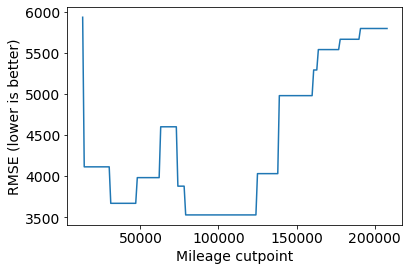

In [ ]:
# plot mileage cutpoint (x-axis) versus RMSE (y-axis)
plt.plot(mileage_range, RMSE)
plt.xlabel('Mileage cutpoint')
plt.ylabel('RMSE (lower is better)')

**Recapitulación:** Antes de cada división, este proceso se repite para cada característica, y se elige la característica y el punto de corte que produce el menor MSE.

## Construir un árbol de regresión en scikit-learn

In [ ]:
# encode car as 0 and truck as 1
train['vtype'] = train.vtype.map({'car':0, 'truck':1})

In [ ]:
# define X and y
feature_cols = ['year', 'miles', 'doors', 'vtype']
X = train[feature_cols]
y = train.price

In [ ]:
# instantiate a DecisionTreeRegressor (with random_state=1)
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(random_state=1)
treereg

DecisionTreeRegressor(random_state=1)

In [ ]:
# use leave-one-out cross-validation (LOOCV) to estimate the RMSE for this model
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3107.1428571428573

## ¿Qué sucede cuando hacemos crecer un árbol demasiado profundo?

- Izquierda: Árbol de regresión para el Salario **crecido a mayor profundidad**.
- A la derecha: Comparación de los errores de **entrenamiento, prueba y validación cruzada** para árboles con diferentes números de hojas

![Salary tree grown deep](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/salary_tree_deep.png)

El **error de entrenamiento** sigue bajando a medida que aumenta el tamaño del árbol (debido al sobreajuste), pero el **error de validación cruzada** más bajo se produce para un árbol con 3 hojas.

## Ajuste de un árbol de regresión

Intentemos reducir el MSE afinando el parámetro **profundidad_máxima**:

In [ ]:
# try different values one-by-one
treereg = DecisionTreeRegressor(max_depth=1, random_state=1)
scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

4050.1443001443

O bien, podríamos escribir un bucle para probar un rango de valores:

In [ ]:
# list of values to try
max_depth_range = range(1, 8)

# list to store the average RMSE for each value of max_depth
RMSE_scores = []

# use LOOCV with each value of max_depth
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=14, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

Text(0, 0.5, 'RMSE (lower is better)')

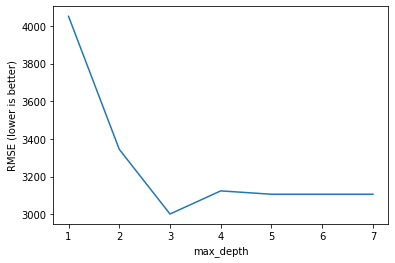

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
# plot max_depth (x-axis) versus RMSE (y-axis)
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE (lower is better)')

In [ ]:
# max_depth=3 was best, so fit a tree using that parameter
treereg = DecisionTreeRegressor(max_depth=3, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=3, random_state=1)

In [ ]:
# "Gini importance" of each feature: the (normalized) total reduction of error brought by that feature
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,year,0.798744
1,miles,0.201256
2,doors,0.000000
3,vtype,0.000000


## Creación de un diagrama de árbol

In [ ]:
# create a Graphviz file
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='tree_vehicles.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_vehicles.dot -o tree_vehicles.png

![Tree for vehicle data](https://github.com/justmarkham/DAT8/raw/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/tree_vehicles.png)

Lectura de los nodos internos:

- **muestras:** número de observaciones en ese nodo antes de la división
- **MSE:** MSE calculado comparando los valores de respuesta reales en ese nodo con el valor de respuesta medio en ese nodo
- **regla:** regla utilizada para dividir ese nodo (ir a la izquierda si es verdadero, ir a la derecha si es falso)

Lectura de las hojas:

- **muestras:** número de observaciones en ese nodo
- **valor:** valor medio de la respuesta en ese nodo
- **mse:** MSE calculado comparando los valores de respuesta reales en ese nodo con el "valor"

## Hacer predicciones para los datos de prueba

In [ ]:
# read the testing data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv'
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [ ]:
# use fitted model to make predictions on testing data
X_test = test[feature_cols]
y_test = test.price
y_pred = treereg.predict(X_test)
y_pred

array([ 4000.,  5000., 13500.])

In [ ]:
# calculate RMSE
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_test, y_pred))

1190.2380714238084

# Parte 2: Árboles de clasificación

## Comparación de árboles de regresión y árboles de clasificación

|Árboles de regresión|Árboles de clasificación|
|---|---|
|Predecir una respuesta continua|Predecir una respuesta categórica|
|predecir utilizando la respuesta media de cada hoja|predecir utilizando la clase más frecuente de cada hoja|
|Se eligen las divisiones para minimizar el MSE.| Se eligen las divisiones para minimizar el índice de Gini (que se discute más adelante).

## Criterios de división para los árboles de clasificación

Opciones comunes para los criterios de división:

- **Índice de error de clasificación:** fracción de observaciones de entrenamiento en una región que no pertenecen a la clase más común
- **Índice de Gini:** medida de la varianza total entre las clases de una región

### Ejemplo de tasa de error de clasificación

Supongamos que estamos prediciendo si alguien compra un iPhone o un Android:

- En un nodo concreto, hay **25 observaciones** (compradores de teléfonos), de las cuales **10 compraron iPhones y 15 compraron Androids**.
- Como la clase mayoritaria es **Android**, esa es nuestra predicción para las 25 observaciones, y por tanto la tasa de error de clasificación es de **10/25 = 40%**.

Nuestro objetivo al hacer divisiones es **reducir la tasa de error de clasificación**. Intentemos dividir en función del sexo:

- *Hombres:* 2 iPhones y 12 Android, por lo que la clase predicha es Android
- *Mujeres:* 8 iPhones y 3 Androids, por lo que la clase predicha es iPhone
- La tasa de error de clasificación tras esta división sería de **5/25 = 20%**.

Compara esto con una división por edad:

- *30 años o menos:* 4 iPhones y 8 Androids, por lo que la clase predicha es Android
- *31 años o más:* 6 iPhones y 7 Androids, por lo que la clase predicha es Android
- La tasa de error de clasificación tras esta división sería de **10/25 = 40%**.

El algoritmo del árbol de decisión probará **todas las divisiones posibles en todas las características**, y elegirá la división que **reduzca al máximo la tasa de error**.

### Ejemplo de índice Gini

Calcule el índice de Gini antes de realizar una división:

$$1 - \left(\frac {iPhone} {Total}\right)^2 - \left(\frac {Android} {Total}\right)^2 = 1 - \left(\frac {10} {25}\right)^2 - \left(\frac {15} {25}\right)^2 = 0.48$$

- El **valor máximo** del índice de Gini es 0,5, y se produce cuando las clases están perfectamente equilibradas en un nodo.
- El **valor mínimo** del índice de Gini es 0, y se produce cuando sólo hay una clase representada en un nodo.
- Se dice que un nodo con un índice de Gini más bajo es más "puro".

Evaluación de la división en **género** mediante el índice de Gini:

$$\text{Males: } 1 - \left(\frac {2} {14}\right)^2 - \left(\frac {12} {14}\right)^2 = 0.24$$
$$\text{Females: } 1 - \left(\frac {8} {11}\right)^2 - \left(\frac {3} {11}\right)^2 = 0.40$$
$$\text{Weighted Average: } 0.24 \left(\frac {14} {25}\right) + 0.40 \left(\frac {11} {25}\right) = 0.31$$

Evaluación de la división en **edad** mediante el índice de Gini:

$$\text{30 or younger: } 1 - \left(\frac {4} {12}\right)^2 - \left(\frac {8} {12}\right)^2 = 0.44$$
$$\text{31 or older: } 1 - \left(\frac {6} {13}\right)^2 - \left(\frac {7} {13}\right)^2 = 0.50$$
$$\text{Weighted Average: } 0.44 \left(\frac {12} {25}\right) + 0.50 \left(\frac {13} {25}\right) = 0.47$$

De nuevo, el algoritmo del árbol de decisión probará **todas las divisiones posibles**, y elegirá la división que **reduce el índice de Gini (y, por tanto, aumenta la "pureza de los nodos")**.

### Comparación de la tasa de error de clasificación y el índice de Gini

- Generalmente se prefiere el índice de Gini porque hará divisiones que **aumenten la pureza de los nodos**, aunque esa división no cambie la tasa de error de clasificación.
- La pureza de los nodos es importante porque estamos interesados en las **proporciones de las clases** en cada región, ya que así calculamos la **probabilidad prevista** de cada clase.
- El criterio de división por defecto de scikit-learn para los árboles de clasificación es el índice de Gini.

Nota: Hay otro criterio de división común llamado **entropía cruzada**. Es numéricamente similar al índice de Gini, pero más lento de calcular, por lo que no es tan popular como el índice de Gini.

## Construir un árbol de clasificación en scikit-learn

Vamos a construir un árbol de clasificación utilizando los datos del Titanic:

In [ ]:
# read in the data
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url)

# encode female as 0 and male as 1
titanic['Sex'] = titanic.Sex.map({'female':0, 'male':1})

# fill in the missing values for age with the median age
titanic.Age.fillna(titanic.Age.median(), inplace=True)

# create a DataFrame of dummy variables for Embarked
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked')
embarked_dummies.drop(embarked_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
titanic = pd.concat([titanic, embarked_dummies], axis=1)

# print the updated DataFrame
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,1


- **Sobrevivido:** 0=muerto, 1=sobrevivido (variable de respuesta)
- **Clase:** 1=primera clase, 2=segunda clase, 3=tercera clase
    - ¿Qué ocurrirá si el árbol se divide en esta característica?
- **Sexo:** 0=femenino, 1=masculino
- **Edad:** valor numérico
- **Embarcado:** C = Cherbourg, Q = Queenstown, S = Southampton

In [ ]:
# define X and y
feature_cols = ['Pclass', 'Sex', 'Age', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
y = titanic.Survived

In [ ]:
# fit a classification tree with max_depth=3 on all data
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth=3, random_state=1)
treeclf.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [ ]:
# create a Graphviz file
export_graphviz(treeclf, out_file='tree_titanic.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_titanic.dot -o tree_titanic.png

![Tree for Titanic data](https://raw.githubusercontent.com/justmarkham/DAT8/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/tree_titanic.png)

Observe la división en la parte inferior derecha: se predice la **misma clase** en sus dos hojas. Esa división no afectó a la **tasa de error de clasificación**, aunque sí aumentó la **pureza del nodo**, lo que es importante porque aumenta la precisión de nuestras probabilidades predichas.

In [ ]:
# compute the feature importances
pd.DataFrame({'feature':feature_cols, 'importance':treeclf.feature_importances_})

,feature,importance
0,Pclass,0.242664
1,Sex,0.655584
2,Age,0.064494
3,Embarked_Q,0.000000
4,Embarked_S,0.037258


# Parte 3: Comparación de los árboles de decisión con otros modelos

**Ventajas de los árboles de decisión:**

- Pueden utilizarse para la regresión o la clasificación
- Se pueden representar gráficamente
- Son altamente interpretables
- Pueden especificarse como una serie de reglas, y se aproximan más a la toma de decisiones humana que otros modelos
- La predicción es rápida
- Las características no necesitan ser escaladas
- Aprende automáticamente las interacciones de las características
- Tiende a ignorar las características irrelevantes
- No paramétrico (superará a los modelos lineales si la relación entre las características y la respuesta es muy poco lineal)

![Trees versus linear models](https://raw.githubusercontent.com/justmarkham/DAT8/226791169b1cc6df8e8845c12e34e748d5ffaa85/notebooks/images/tree_vs_linear.png)

**Desventajas de los árboles de decisión**

- El rendimiento no es (generalmente) competitivo con los mejores métodos de aprendizaje supervisado
- Pueden sobreajustar fácilmente los datos de entrenamiento (se requiere un ajuste)
- Pequeñas variaciones en los datos pueden dar lugar a un árbol completamente diferente (alta varianza)
- La división binaria recursiva toma decisiones "localmente óptimas" que pueden no resultar en un árbol globalmente óptimo
- No suele funcionar bien si las clases están muy desequilibradas
- No suele funcionar bien con conjuntos de datos muy pequeños